### Phys 629, Fall 2023, University of Mississippi


# Lecture 10, Chapter 4: Classical Statistical Inference

Material in this lecture and notebook is based upon the Basic Stats portion of G. Richards' "Astrostatistics" class at Drexel University (PHYS 440/540, https://github.com/gtrichards/PHYS_440_540), the Introduction to Probability & Statistics portion of A. Connolly's & Ž. Ivezić's "Astrostatistics & Machine Learning" class at the University of Washington (ASTR 598, https://github.com/dirac-institute/uw-astr598-w18), J. Bovy's mini-course on "Statistics & Inference in Astrophysics" at the University of Toronto (http://astro.utoronto.ca/~bovy/teaching.html), and Stephen R. Taylor (https://github.com/VanderbiltAstronomy/astr_8070_s22). 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 4.

***Exercises required for class participation are in <font color='red'>red</font>.***

## Quantifying Estimate Uncertainty <a class="anchor" id="four"></a>

Our ML estimate of $\mu$ is not perfect. The uncertaintly of the estimate is captured by the shape and distribution of the likelihood function, but we'd like to capture that with a few numbers.

The ***asymptotic normality of MLE*** is invoked to approximate the likelihood function as a Gaussian (or the $\ln L$ as a parabola), i.e., we take a Taylor expansion around the MLE, keep terms up $2^\mathrm{nd}$ order, then *define* the uncertainty on our model parameters as:

$$\sigma_{jk} = \sqrt{[F^{-1}]_{jk}}, $$

where

$$ F_{jk} = - \frac{\partial^2}{\partial\theta_j} \frac{\ln L}{\partial\theta_k} \Biggr\rvert_{\theta=\hat \theta}.$$

The matrix $F$ is known as the **observed Fisher information matrix**. The elements $\sigma^2_{jk}$ are known as the ***covariance matrix***.

The marginal error bars for each parameter, $\theta_i$ are given by the diagonal elements, $\sigma_{ii}$. These are the "error bars" that are typically quoted with each measurement. Off diagonal elements, $\sigma_{ij}$, arise from any correlation between the parameters in the model.

In our example of a homoscedastic Gaussian, the uncertainly on the mean is 

$$\sigma_{\mu} = \left( - \frac{\partial^2\ln L(\mu)}{\partial\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$

We find

$$\frac{\partial^2\ln L(\mu)}{\partial\mu^2}\Biggr\rvert_{\hat \mu} = - \sum_{i=1}^N\frac{1}{\sigma^2} = -\frac{N}{\sigma^2},$$

since, again, $\sigma = {\rm constant}$.  

Then 

$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

So, our estimator of $\mu$ is $\overline{x}\pm\frac{\sigma}{\sqrt{N}}$, which is a result that you should be familiar with. 

<font color='red'>Let's check this with a quick and dirty calculation. In the following, we</font>

<font color='red'>- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function (computed in lecture 9) with `np.diff`, </font>

<font color='red'>- divide through by our $\Delta \theta^2$ to get the correct normalization, </font>

<font color='red'>- multiply by $-1$, </font>

<font color='red'>- then take the square root. </font>

In [1]:
# Read, think about, and execute the following cell
#COPY AND PASTE FROM LAST CLASS!

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 3 #Complete
mu = 1.0
sigma = 0.2 
np.random.seed(42)
sample = norm(mu,sigma).rvs(N)

xgrid = np.linspace(0,2,1000)
L1 = norm.pdf(xgrid,loc=sample[0],scale=sigma) #This is a Gaussian PDF sampled uniformly, centered at a specific location.
L2 = norm.pdf(xgrid,loc=sample[1],scale=sigma)
L3 = norm.pdf(xgrid,loc=sample[2],scale=sigma)
L = L1*L2*L3 #Total L is ???

sigma_mu = np.diff(np.log(L), n=2)
sigma_mu /= (xgrid[1]-xgrid[0])**2
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)[0]

print("Fisher matrix error on estimated mean is %.3f" % sigma_mu)

# Calculating mu_^
sorted_indices = np.argsort(L) #??
index_max = sorted_indices[-1] #??
print("Likelihood is maximized at %.3f" % xgrid[index_max]) #??

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Fisher matrix error on estimated mean is 0.115
Likelihood is maximized at 1.067


<font color='red'>Let's plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution for the three data points above.</font>

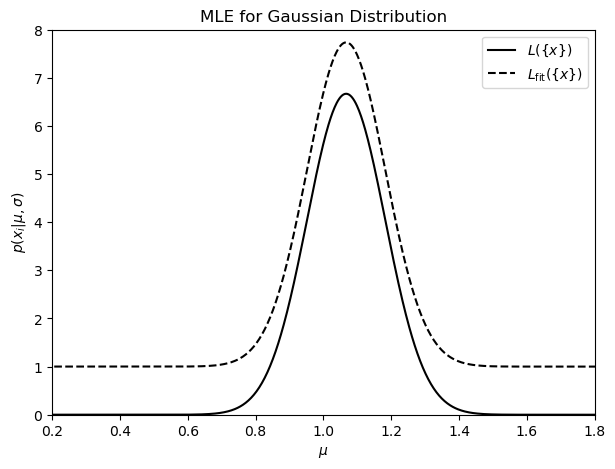

In [2]:
# Execute the following cell

xgrid = np.linspace(0.0,2.0,1000)
L = np.prod([L1,L2,L3],axis=0) # Total L is ???
# complete the following for measured mean and Fisher error
Lfit = norm.pdf(xgrid,loc=xgrid[index_max],scale=sigma_mu)  

fig, ax = plt.subplots(figsize=(7, 5))

# plot numerical likelihood
plt.plot(xgrid, L, ls='-', c='black', 
         label=r'$L(\{x\})$')

# plot fitted Gaussian with arbitrary normalizing constant
# offset for ease of viewing
C = 1.95
plt.plot(xgrid, C * Lfit + 1.0, ls='dashed', 
         c='black', label=r'$L_\mathrm{fit}(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

Looks pretty, pretty, pretty good.

But does this agree with the general homoescedastic sample mean uncertainty? <font color='red'>Compute $\sigma_\mu$ from one of the formulae above with $N=3$. Does it agree with the Fisher matrix error?</font>

In [21]:
# Must run previous block before this one
sigma_new_mu = sigma/np.sqrt(N)

print('The old sigma_mu is', sigma_mu)
print('The new method gives sigma_mu =', sigma_new_mu)

print('\nThese methods return the exact same values.')

The old sigma_mu is 0.11547005383792516
The new method gives sigma_mu = 0.11547005383792516

These methods return the exact same values.


### What is $\pm \sigma$? 

The result for $\sigma_{\mu}$ has been derived by expanding $\ln L$ in a Taylor series and retaining terms up to second order (essentially, $\ln L$ is approximated by a parabola, or an ellipsoidal surface in multidimensional cases, around its maximum). If this expansion is exact (as is the case for a Gaussian error distribution), then we've completely captured the error information.

In general, this is not the case and the likelihood surface can significantly deviate from a smooth elliptical surface. Furthermore, it often happens in practice that the likelihood surface is multimodal. It is always a good idea to visualize the likelihood surface when in doubt (see examples in §5.6 in the textbook).

The $(\hat \mu - \sigma_\mu, \hat \mu + \sigma_\mu)$ range gives us a **confidence interval**.

In frequentist interptetation, if we repeated the same measurement a hundred times, we'd find for 68 experiments the true value was within their computed confidence intervals ($1 \sigma$ errors).

## MLE applied to a Heteroscedastic Gaussian <a class="anchor" id="five"></a>

Now let's look a case where the uncertainties are heteroscedastic.  For example if we are measuring the length of a rod and have $N$ measurements, $\{x_i\}$, where the uncertainty for each measurement, $\sigma_i$ is known.  Since $\sigma$ is not a constant, then following the above, we have

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} = \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\hat \mu}{\sigma_i^2},$$

yields a MLE solution of 
$$\hat \mu = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$

## Working with non-Gaussian Likelihoods <a class="anchor" id="six"></a>

As an example of MLE with non-Gaussian probability density we can use the same formalism above for a Poisson distribution. In this case we write the probability disrtibution as

$$p(x_i|\mu) = \frac{e^{-\mu}\mu^{x_i}}{x_i!}$$

with $\mu$ the average number of events, $N$ is the number of observed events, and $\{x_i\}$ are the measured data.

As we saw before, this distribution is particularly useful for characterizing the number of soldiers in the Prussian army killed accidentally by horse kicks.

We can then write the likelihood as

$$L \equiv p(\{x_i\}|\mu) = \prod_{i=1}^{N} \frac{e^{-\mu}\mu^{x_i}}{x_i!}$$

and the $\ln L$ as

$$\ln L = \sum_{i=1}^{N} \ln \bigg( \frac{e^{-\mu}\mu^{x_i}}{x_i!} \bigg)$$

$$= \sum_{i=1}^{N} -\mu + x_i \; \ln(\mu) - \ln({x_i!})$$

### Maximizing the $\ln L$ 

For the Poisson distribution we can solve for the maximum liklehood analytically

$$\frac{\partial \; L(\mu)}{\partial \; \mu} = \frac{\partial \; }{\partial \; \mu} \bigg( \sum_{i=1}^{N} -\mu + x_i \; \ln(\mu)\bigg)$$

$$0 = \sum_{i=1}^{N} \bigg( -1 + \frac{x_i}{\mu} \bigg)$$
$$\hat\mu = \frac{1}{N} \sum_{i=1}^{N} x_i $$

What do you know!? The same as for a homoescedastic Gaussian! 

***For many likelihoods we cannot solve for the maximum analytically, and we have to resort to numerical solutions.*** We'll treat these in detail later using MCMC and robust statistics that account for outliers.

In [1]:
# Install seaborn.
# This package can make matplotlib prettier
!pip install seaborn

<font color='red'>Execute this cell to plot some Poisson draws from different means</font>

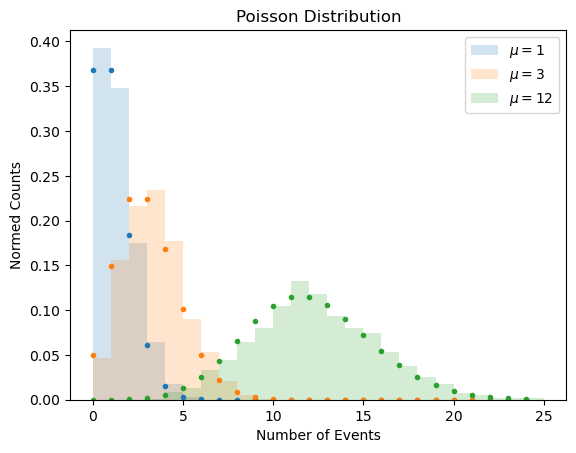

In [3]:
from scipy.stats import poisson
import seaborn as sns # Install seaborn

# generate samples for different values of mu
kpts=np.arange(0,25)
for mu, c in zip([1,3,12], 
                 sns.color_palette()[:4]):
    # random draws
    randomVariates = poisson.rvs(mu, size=1000)
    # histogram of random draws
    plt.hist(randomVariates, density=True, color=c, alpha=0.2, 
             bins=range(0,26), label='$\mu=' + str(mu) + '$')
    # probability density at bin locations
    plt.plot(kpts, poisson.pmf(kpts, mu), '.', color=c)
    
plt.legend()
plt.title("Poisson Distribution")
plt.xlabel("Number of Events")
plt.ylabel("Normed Counts");

<font color='red'>Complete and execute the following cell to generate $5$ random samples from a $\mu=12$ Poisson distribution and find the MLE $\hat\mu$ from the data.</font>

In [7]:
poisson_data = poisson.rvs(12, size=5)

# Scan across 1000 possible mu values from 3 to 20.
mu_proposed = np.linspace(3,20,1000)

# compute the lnL for each possible mu.
lnL_scan = []
for mu in mu_proposed:
    lnL_temp = poisson.logpmf(poisson_data, mu=mu) # gives you the log prob. density; useful!
    lnL_temp = np.sum(lnL_temp) # sum over the log pmf of all data points
    lnL_scan.append( lnL_temp )
    
# convert to numpy array
lnL_scan = np.array(lnL_scan)

# write some quick code below to find the element of 
# mu_proposed that maximizes the lnL.

idx_mu = np.argmax(lnL_scan)
max_mu = mu_proposed[idx_mu]

print("The MLE for mu is:", max_mu)

The MLE for mu is: 10.997997997997999


<font color='red'>Plot lnL vs mu_proposed and indicate where it is maximized.</font>

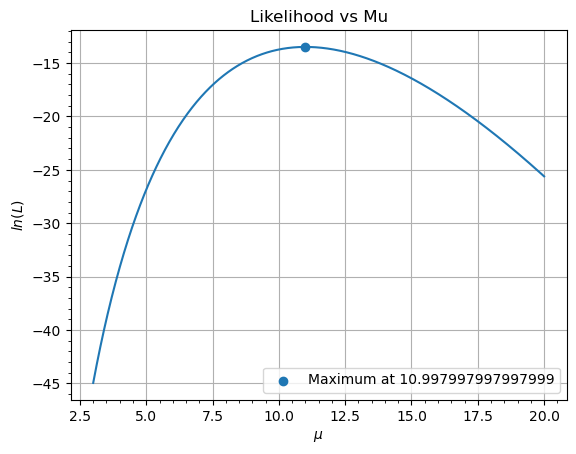

In [13]:
import matplotlib.pyplot as plt

plt.plot(mu_proposed,lnL_scan)
plt.xlabel('$\mu$')
plt.ylabel('$ln(L)$')
plt.title('Likelihood vs Mu')
plt.scatter(max_mu, lnL_scan[idx_mu], label=f'Maximum at {max_mu}')
plt.legend()
plt.grid()
plt.minorticks_on()